<a href="https://colab.research.google.com/github/Kinbloom/MchezoPesa-Football-Analysis/blob/master/MchezoPesa_Football_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Define The Question

You have been recruited as a football analyst in a company (Mchezopesa Ltd.) to accomplish the task below.

Provided two datasets containing football results and football ranking data, take two approaches to establish the probability of a win, loss or draw and to also predict how many goals a home team is most likely to score.



> **Approach 1 : Polynomial Approach**

What to train given:

1. Rank of home team

2. Rank of away team

3. Tournament type

Model 1: Predict how many goals the home team scores

Model 2: Predict how many goals the away team scores




> **Approach 2 : Logistic Approach**

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)








##What are my metrics of success?



1.   Create a polynomial regression model that predicts how many goals the home team scores with an RMSE score that is less than a fifth of the mean.

2.   Create a polynomial regression model that predicts how many goals the away team scores with an RMSE score that is less than a fifth of the mean.

3.   Create an ordinal logistic model thar can predict who wins, loses or draws in a match with a high level of accuracy.



##Some background information (Context)

The dataset files can be found in a zip file through the google drive link shown below.

https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc

There are 2 datasets:

fifa_ranking.csv and results.csv

##Steps taken in this Analysis

This is the flow of the analysis:

1. Perform the Exploratory Data Analysis

2. Perform any necessary feature engineering

3. Check for multicollinearity

4. Start building the model

5. Cross-validate the model

6. Compute the RMSE

7. Create residual plots for your models, and assess their heteroskedasticity using the Bartlett’s test

8. Perform appropriate regressions on the data including your justification

9. Challenge your solution by providing insights on how you can make improvements

##Exploratory Data Analysis

##The Data Cleaning Process

**Load the libraries to be used in this analysis**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

import datetime as dt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score

import warnings
warnings.filterwarnings('ignore')

###Exploratory Analysis on the fifa_ranking dataset

In [0]:
#Load the fifa_ranking.csv file

fifa_ranking = pd.read_csv('fifa_ranking.csv')

In [4]:
#Load the first 5 entries of the dataset

fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [5]:
#Load the last 5 entries of the dataset

fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [6]:
#How many rows and columns does the dataset have?

fifa_ranking.shape

(57793, 16)

In [7]:
#What are the data types, number of entries per column?

fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [8]:
#Are there any null values?

fifa_ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There seem to be no null/missing values in the dataset.

In [9]:
#Perform descriptive analysis on the numerical columns in the dataset

fifa_ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [69]:
#Check the datasets for duplicates and thereafter drop the duplicates

fifa_ranking.duplicated().any()

True

In [0]:
#Drop the duplicates since the duplicate check returned true

fifa_ranking.drop_duplicates(keep='first', inplace = True)

In [71]:
#Check the number of rows and columns

fifa_ranking.shape

(57756, 16)

In [0]:
#Rename the country_full column to country

fifa_ranking.country_full = fifa_ranking.rename({'country_full': 'country'}, axis = 1, inplace = True)

In [0]:
#Drop certain columns that aren't as relevant in the analysis

fifa_ranking.drop(columns=['cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'country_abrv'], inplace=True)

In [74]:
#Display the fifa_ranking dataset

fifa_ranking.head()

,rank,country,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57,0,1993-08-08
1,2,Italy,0.0,57,0,1993-08-08
2,3,Switzerland,0.0,50,9,1993-08-08
3,4,Sweden,0.0,55,0,1993-08-08
4,5,Argentina,0.0,51,5,1993-08-08


In [0]:
#Create two new columns for the month and the year, basically split the date column. 
#Since the rank_date is an object data type we have to change it to datetime

fifa_ranking.rank_date = fifa_ranking.rank_date.apply(lambda x: x.replace('/', '-'))

fifa_ranking.rank_date = pd.to_datetime(fifa_ranking.rank_date)

fifa_ranking['year'] = fifa_ranking.rank_date.dt.year

fifa_ranking['month'] = fifa_ranking.rank_date.dt.month

In [76]:
#Check the new dataset

fifa_ranking.head()

,rank,country,total_points,previous_points,rank_change,rank_date,year,month
0,1,Germany,0.0,57,0,1993-08-08,1993,8
1,2,Italy,0.0,57,0,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,1993-08-08,1993,8


In [77]:
#Check the unique years in the dataset

fifa_ranking.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

**The fifa_ranking dataset runs from 1993 to 2018**

###Exploratory Analysis on the results dataset

In [0]:
#Load the dataset

results = pd.read_csv('results.csv')

In [79]:
#Load the first 5 entries of the dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [80]:
#Load the last 5 entries of the dataset

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [136]:
results.describe()

,home_score,away_score,year,month
count,23478.000000,23478.000000,23478.000000,23478.000000
mean,1.650992,1.100009,2006.408510,6.721015
std,1.704275,1.349406,7.410476,3.244628
min,0.000000,0.000000,1993.000000,1.000000
25%,0.000000,0.000000,2000.000000,4.000000
50%,1.000000,1.000000,2007.000000,6.000000
75%,2.000000,2.000000,2013.000000,10.000000
max,31.000000,21.000000,2019.000000,12.000000


In [33]:
#Check the number of rows and columns 

results.shape

(40839, 9)

In [0]:
#Drop the irrelevant columns

results.drop(columns=['city'], inplace=True)

In [0]:
#Split the date column into month and year then add those two columns

results.date = results.date.apply(lambda x: x.replace('/', '-'))

results.date = pd.to_datetime(results.date)

results['year'] = results.date.dt.year

results['month'] = results.date.dt.month

In [83]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,1876,3


In [0]:
#Since the ranking starts from 1993, we eliminate all the data dated before 1993

results = results [results['date']>='1993']

In [85]:
#Validating the years in the results dataset

results.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

###Merging the two datasets to obtain the home_team ranking dataset (home_rank)

In [0]:
#results + fifa_ranking = home_rank

home_rank = pd.merge(fifa_ranking, results, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','home_team'])

In [87]:
home_rank.head()

,rank,country_x,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country_y,neutral
0,4,Sweden,0.0,55,0,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,0.0,55,0,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,0.0,55,-5,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False


In [0]:
#Drop irrelevant columns

home_rank.drop(columns=['country_y','rank_date','date'], inplace=True)

In [0]:
#Rename certain columns

home_rank.country_x = home_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [0]:
home_rank.rank = home_rank.rename({'rank': 'home_rank'}, axis = 1, inplace = True)

In [91]:
home_rank.head()

,home_rank,country,total_points,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,4,Sweden,0.0,55,0,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,4,Sweden,0.0,55,0,1993,8,Sweden,France,1,1,FIFA World Cup qualification,False
2,5,Argentina,0.0,51,5,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,False
3,5,Argentina,0.0,51,5,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification,False
4,8,Brazil,0.0,55,-5,1993,8,Brazil,Mexico,1,1,Friendly,False




> **NB** : The country is similar to the home_team in the home_rank dataset.



In [92]:
#Rearrange the home_rank dataset

home_rank = home_rank[['home_rank','rank_change','country','home_team','away_team','home_score','away_score','tournament','neutral','month','year','total_points','previous_points']]

home_rank.head()


,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51
3,5,5,Argentina,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,8,1993,0.0,51
4,8,-5,Brazil,Brazil,Mexico,1,1,Friendly,False,8,1993,0.0,55


###Merging the two datasets to obtain the away_team ranking dataset (away_rank)

In [0]:
#results + fifa_ranking = away_rank

away_rank = pd.merge(fifa_ranking, results, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','away_team'])

In [94]:
away_rank.head()

,rank,country_x,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country_y,neutral
0,3,Switzerland,0.0,50,9,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,0.0,55,-5,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False


In [0]:
#Drop irrelevant columns

away_rank.drop(columns=['country_y','rank_date','date'], inplace=True)

In [0]:
#Rename certain columns

away_rank.country_x = away_rank.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [0]:
away_rank.rank = away_rank.rename({'rank': 'away_rank'}, axis = 1, inplace = True)

In [98]:
away_rank.head()

,away_rank,country,total_points,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,3,Switzerland,0.0,50,9,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,5,Argentina,0.0,51,5,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,False
2,5,Argentina,0.0,51,5,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,False
3,5,Argentina,0.0,51,5,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,False
4,8,Brazil,0.0,55,-5,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,False


In [99]:
#Rearrange the away_rank dataset

away_rank = away_rank[['away_rank','away_team','month','year']]

away_rank.head()


,away_rank,away_team,month,year
0,3,Switzerland,8,1993
1,5,Argentina,8,1993
2,5,Argentina,8,1993
3,5,Argentina,8,1993
4,8,Brazil,8,1993


###Merge to create a final Daaset that combines the home rank and away rank

In [0]:
#Merge the home_rank and away_rank datasets using the away_team, month and year
#Why link with the away_team? You want the final dataset to contain home rank and away rank.

home_away = pd.merge(home_rank, away_rank, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])

In [101]:
home_away.head()

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points,away_rank
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55,3
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55,12
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70
3,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70
4,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70


In [102]:
#Rearrange the home_away dataset

home_away = home_away[['home_rank','away_rank','country','home_team','away_team','home_score','away_score','tournament','month','year','total_points','previous_points']]

home_away.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51


##Data Understanding

We are now using one final dataset (home_away dataset)

###Checking for outliers

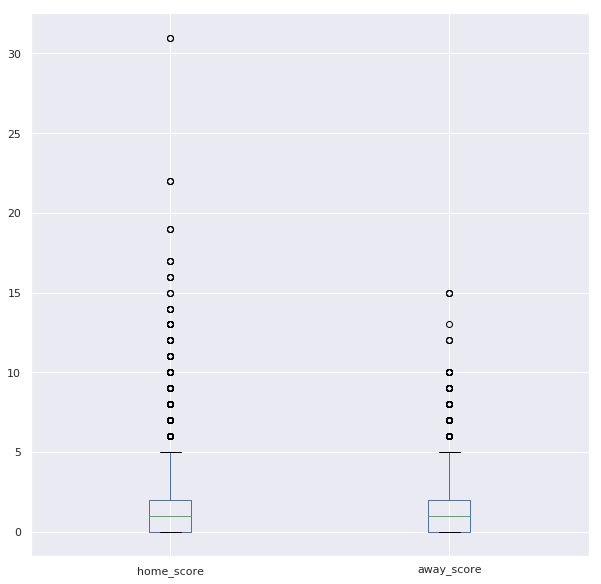

In [103]:
check=['home_score','away_score']

plt.subplots(figsize=(10,10))
home_away.boxplot(check)

plt.title=('Checking for Outliers in Home and Away scores')
plt.show()

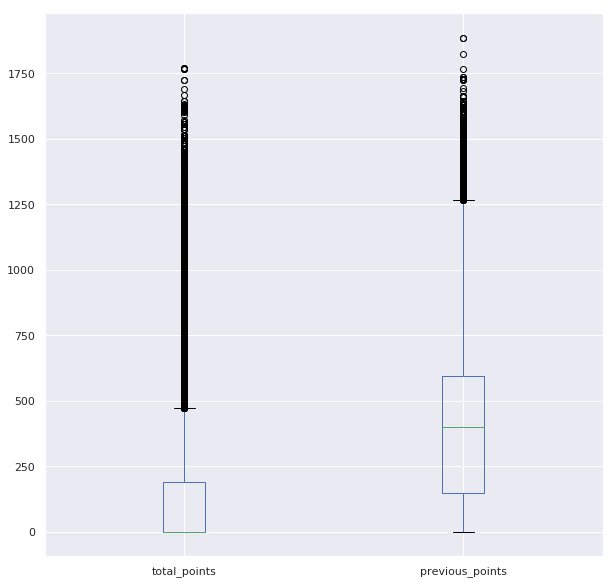

In [104]:
check=['total_points','previous_points']

plt.subplots(figsize=(10,10))
home_away.boxplot(check)

plt.title=('Checking for Outliers in Total and Previous points')
plt.show()

**There are many outliers clearly seen but we can not drop them since they are legitimate values that do affect the general outcome of the prediction model.**

##Feature Engineering

In [105]:
#Create a new column in the home_away dataset. This shows the goal difference between the home and away score.

home_away['goal_difference'] = home_away['home_score'] - home_away['away_score']

home_away.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_difference
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55,-1
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55,0
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1


In [0]:
#Create a column to check whether the home team logged a win, loss or a draw 

def home_team(home_scores):
    if home_scores > 0:
        return 'Win'
    elif home_scores < 0:
        return 'Loss'
    else:
        return 'Draw'
      
home_away['match_outcome'] = home_away.goal_difference.apply(lambda h: home_team(h))

In [107]:
home_away.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_difference,match_outcome
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55,-1,Loss
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55,0,Draw
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win


In [0]:
#We have to specify the tournament type in three categories : 
#   1. FIFA World Cup
#   2. Friendly
#   3. Other

def tournamnt(ttype):
    if ttype == 'Friendly':
        return 'Friendly'
    elif ttype == 'FIFA World Cup':
        return 'FIFA World cup'
    else:
        return 'Other'
      
home_away['tournament_type'] = home_away.tournament.apply(lambda t: tournamnt(t))

In [109]:
home_away.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_difference,match_outcome,tournament_type
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55,-1,Loss,Friendly
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55,0,Draw,Other
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win,Other
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win,Other
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1,Win,Other


In [0]:
#Drop the tournament column and leave the tournament_type column

home_away.drop(columns=['tournament'], inplace=True)

###Checking for multi-collinearity

In [49]:
#Are the independent variables correlated? We get the Pearson's correlation to find out. A heatmap can also give better visualization.

corr = home_away.corr()

corr

,home_rank,away_rank,home_score,away_score,month,year,total_points,previous_points,goal_difference
home_rank,1.000000,0.515308,-0.114510,0.221365,0.067434,0.091889,-0.299439,-0.652942,-0.210721
away_rank,0.515308,1.000000,0.307728,-0.151487,0.068120,0.091281,-0.147924,-0.310923,0.312198
home_score,-0.114510,0.307728,1.000000,-0.161033,0.020218,-0.052214,0.012154,0.069234,0.824708
away_score,0.221365,-0.151487,-0.161033,1.000000,0.019419,-0.012372,-0.061949,-0.130760,-0.690983
month,0.067434,0.068120,0.020218,0.019419,1.000000,-0.008268,0.011014,-0.068743,0.003681
year,0.091889,0.091281,-0.052214,-0.012372,-0.008268,1.000000,0.624147,0.408979,-0.031154
total_points,-0.299439,-0.147924,0.012154,-0.061949,0.011014,0.624147,1.000000,0.546987,0.044401
previous_points,-0.652942,-0.310923,0.069234,-0.130760,-0.068743,0.408979,0.546987,1.000000,0.125640
goal_difference,-0.210721,0.312198,0.824708,-0.690983,0.003681,-0.031154,0.044401,0.125640,1.000000


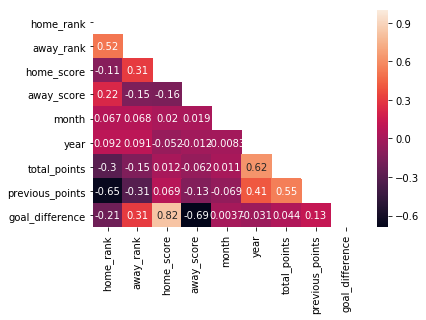

In [50]:
#Display a heatmap

mask = np.zeros_like(home_away.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(home_away.corr(), annot=True, mask=mask)

Alternatively, we can use the VIF to check for multi-collinearity.

**What is VIF ?**

It is the Variance Inflation Factor, it is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

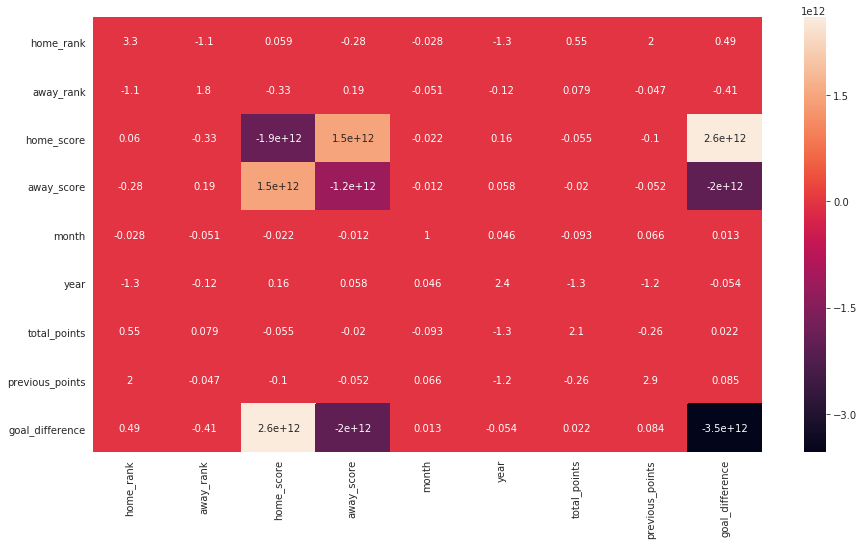

In [51]:
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

#Plot a heatmap

sns.set_style('dark')
plt.subplots(figsize =  (15,8))
sns.heatmap(vif_df, annot = True)


plt.show()

##Building The Model

###Approach 1 : Polynomial Regression

In [0]:
home_away_df = home_away[['home_team','away_team','home_score','away_score','tournament_type','home_rank','away_rank','match_outcome']]


In [0]:
home_away_df.to_csv('fifa_dataset.csv')

In [0]:
home_away_df = pd.read_csv('fifa_dataset.csv')

In [116]:
home_away_df.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
0,0,Sweden,Switzerland,1,2,Friendly,4,3,Loss
1,1,Sweden,France,1,1,Other,4,12,Draw
2,2,Argentina,Peru,2,1,Other,5,70,Win
3,3,Argentina,Peru,2,1,Other,5,70,Win
4,4,Argentina,Peru,2,1,Other,5,70,Win


In [0]:
#Drop the Unnamed: 0 column

home_away_df.drop(columns=['Unnamed: 0'], inplace=True)

In [126]:
home_away_df.head()

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,match_outcome
0,Sweden,Switzerland,1,2,Friendly,4,3,Loss
1,Sweden,France,1,1,Other,4,12,Draw
2,Argentina,Peru,2,1,Other,5,70,Win
3,Argentina,Peru,2,1,Other,5,70,Win
4,Argentina,Peru,2,1,Other,5,70,Win


###Model 1 : Predicting the home score using Polynomial Regression

In [127]:
# Creating the X and y variables

X = home_away_df.iloc[:, [0, 1, 3, 4, 5, 6]]
y = home_away_df.home_score

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())


   home_team    away_team  away_score tournament_type  home_rank  away_rank
0     Sweden  Switzerland           2        Friendly          4          3
1     Sweden       France           1           Other          4         12
2  Argentina         Peru           1           Other          5         70
3  Argentina         Peru           1           Other          5         70
4  Argentina         Peru           1           Other          5         70
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    1
1    1
2    2
3    2
4    2
Name: home_score, dtype: int64


In [0]:
#Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [0]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


If you don't specify the random_state in your code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [0]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [132]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Making predictions

y_pred = regressor.predict(X_test)

In [134]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.3669222743782399


The RMSE score is quite high, since a fifth mean is significantly lower than 1.3669

**Using the Bartlett's test to check for heteroskedasticty**

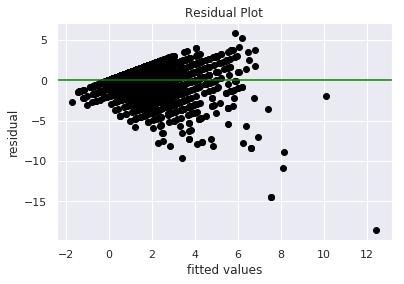

In [53]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

###Model 2 : Predicting the Away score using Polynomial Regression 

In [137]:
# Creating the X and y variables

X = home_away_df.iloc[:, [0, 1, 2, 4, 5, 6]]
y = home_away_df.away_score

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())

   home_team    away_team  home_score tournament_type  home_rank  away_rank
0     Sweden  Switzerland           1        Friendly          4          3
1     Sweden       France           1           Other          4         12
2  Argentina         Peru           2           Other          5         70
3  Argentina         Peru           2           Other          5         70
4  Argentina         Peru           2           Other          5         70
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    2
1    1
2    1
3    1
4    1
Name: away_score, dtype: int64


In [0]:
#Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [0]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [0]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [142]:
# Training the model

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Making predictions

y_pred = regressor.predict(X_test)

In [144]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.112224467283188


The RMSE model is significantly higher than a fifth of the mean. The model isn't conclusive and has low predictive capability.

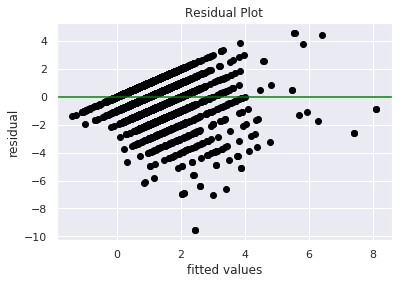

In [63]:
residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='green')
plt.show()

##Approach 2 : Logistic Regression

In [145]:
# Creating the X and y variables

X = home_away_df.iloc[:, [0, 1, 2, 3, 4, 5, 6]]
y = home_away_df.match_outcome

print(X.head())
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print(y.head())

   home_team    away_team  home_score  ...  tournament_type home_rank  away_rank
0     Sweden  Switzerland           1  ...         Friendly         4          3
1     Sweden       France           1  ...            Other         4         12
2  Argentina         Peru           2  ...            Other         5         70
3  Argentina         Peru           2  ...            Other         5         70
4  Argentina         Peru           2  ...            Other         5         70

[5 rows x 7 columns]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    Loss
1    Draw
2     Win
3     Win
4     Win
Name: match_outcome, dtype: object


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [147]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})
print("The f1 score of the model is", {f1_score(y_test, y_pred, average = "macro")})


The accuracy of the model is {0.6944444444444444}
The f1 score of the model is {0.6198210932650613}


Logistic Regression could predict with 69% accuracy whether a team would win, draw or loose at home based on the tounament, if the ground was neutral and home team and away team FIFA ranking.

Overall the accuracy is generally low. To increase the accuracy of the model an increase in data points can improve accuracy in prediction significantly.

##Challenging the Solution

Attempt to make the predictions using other models to find out which one has the highest accuracy.

